In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv("Literacy 2011-2021.csv")
data.head()

,State,Year,Literacy Rate,Male Literacy,Female Literacy,total Population,Literate Population
0,Andaman & Nicobar Islands,2011,86.3,90.1,81.8,380581,3.284414e+05
1,Andhra Pradesh,2011,67.4,74.8,60.0,84580777,5.700744e+07
2,Arunachal Pradesh,2011,67.0,73.7,59.6,1383727,9.270971e+05
3,Assam,2011,73.2,78.8,67.3,31205576,2.284248e+07
4,Bihar,2011,63.8,73.5,53.3,104099452,6.641545e+07


In [3]:
data = data[data['State'] != 'India']

In [4]:
new_data = data.drop(columns=["total Population","Literate Population"])
new_data.head()

,State,Year,Literacy Rate,Male Literacy,Female Literacy
0,Andaman & Nicobar Islands,2011,86.3,90.1,81.8
1,Andhra Pradesh,2011,67.4,74.8,60.0
2,Arunachal Pradesh,2011,67.0,73.7,59.6
3,Assam,2011,73.2,78.8,67.3
4,Bihar,2011,63.8,73.5,53.3


In [5]:
data_temp = new_data.copy()

### Convert strings to pnadas categories

In [6]:
pd.api.types.is_string_dtype(data_temp["State"])


True

In [7]:
# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State


In [8]:
# This will convert all strings to category
for label, content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

In [9]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 72
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   State            72 non-null     category
 1   Year             72 non-null     int64   
 2   Literacy Rate    72 non-null     float64 
 3   Male Literacy    72 non-null     float64 
 4   Female Literacy  72 non-null     float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 4.2 KB


In [10]:
data_temp.State.cat.categories

Index(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Harayana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghhalaya', 'Mizoram ', 'Nagaland', 'Orissa', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim ', 'Tamil Nadu', 'Telangana', 'Tripura ',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [11]:
data_temp.State.cat.codes

0      0
1      1
2      2
3      3
4      4
      ..
68    32
69    33
70    34
71    35
72    31
Length: 72, dtype: int8

In [12]:
data_temp.head()

,State,Year,Literacy Rate,Male Literacy,Female Literacy
0,Andaman & Nicobar Islands,2011,86.3,90.1,81.8
1,Andhra Pradesh,2011,67.4,74.8,60.0
2,Arunachal Pradesh,2011,67.0,73.7,59.6
3,Assam,2011,73.2,78.8,67.3
4,Bihar,2011,63.8,73.5,53.3


In [13]:
# Check missing data
data_temp.isnull().sum()/len(data_temp)

State              0.0
Year               0.0
Literacy Rate      0.0
Male Literacy      0.0
Female Literacy    0.0
dtype: float64

In [14]:
data_temp['StateCodes'] = data_temp.State.cat.codes
data_temp.head()

,State,Year,Literacy Rate,Male Literacy,Female Literacy,StateCodes
0,Andaman & Nicobar Islands,2011,86.3,90.1,81.8,0
1,Andhra Pradesh,2011,67.4,74.8,60.0,1
2,Arunachal Pradesh,2011,67.0,73.7,59.6,2
3,Assam,2011,73.2,78.8,67.3,3
4,Bihar,2011,63.8,73.5,53.3,4


In [15]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 72
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   State            72 non-null     category
 1   Year             72 non-null     int64   
 2   Literacy Rate    72 non-null     float64 
 3   Male Literacy    72 non-null     float64 
 4   Female Literacy  72 non-null     float64 
 5   StateCodes       72 non-null     int8    
dtypes: category(1), float64(3), int64(1), int8(1)
memory usage: 4.3 KB


## Modelling

In [16]:
X = data_temp.drop(columns=["Literacy Rate","State"])
y = data_temp["Literacy Rate"]
X.head()

,Year,Male Literacy,Female Literacy,StateCodes
0,2011,90.1,81.8,0
1,2011,74.8,60.0,1
2,2011,73.7,59.6,2
3,2011,78.8,67.3,3
4,2011,73.5,53.3,4


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model1.fit(X_train,y_train)
y_preds1 = model1.predict(X_test)
y_preds1

array([85.9077, 77.7105, 91.858 , 84.878 , 78.3994, 55.6245, 87.034 ,
       74.1147, 77.3999, 79.022 , 69.453 , 86.708 , 85.901 , 80.1278,
       84.997 ])

In [19]:
accuracy = model1.score(X_test,y_test)
print(accuracy*100,"%")

54.154437023423306 %


#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9152667785614136

#### Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor(random_state=42)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.5896627517213511

### XG Boost

In [22]:
import xgboost as xgb

model5 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)               

0.5896627517213511

#### Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
model3 = Ridge(random_state=42)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9119530819529578

In [24]:
y_preds_2 = model4.predict(X)
scores_2 = pd.DataFrame(columns=["Actual Literacy Rate","Predicted Literacy Rate"])
scores_2["Actual Literacy Rate"] = y
scores_2["Predicted Literacy Rate"] = y_preds_2
scores_2.head(10)


,Actual Literacy Rate,Predicted Literacy Rate
0,86.3,82.070755
1,67.4,67.393113
2,67.0,67.339490
3,73.2,73.065600
4,63.8,84.820842
5,86.4,85.189173
6,71.0,71.416057
7,77.7,77.615593
8,87.1,87.022557
9,86.3,85.650048


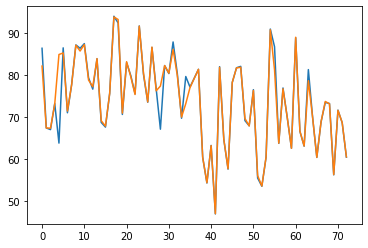

In [25]:
plt.plot(scores_2["Actual Literacy Rate"], label='actual')
plt.plot(scores_2["Predicted Literacy Rate"], label='predicted')

### Accuracy Metrics

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse= mean_squared_error(y, y_preds_2)
rmse= r2_score(y, y_preds_2)
mae = mean_absolute_error(y,y_preds_2)

mse,rmse,mae

(9.0548813719011, 0.9183947961806387, 0.8899501993559057)

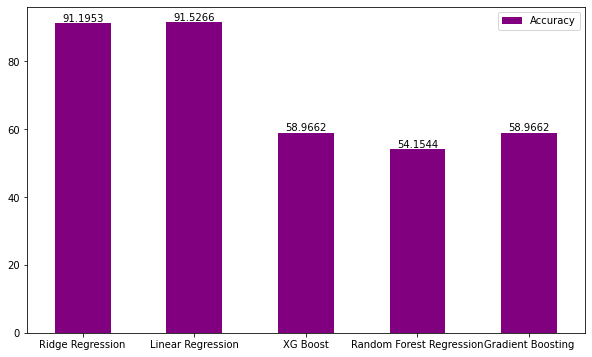

In [27]:
model_score = {'Ridge Regression':91.1953,
               'Linear Regression':91.5266,
               'XG Boost':58.9662,
               'Random Forest Regression':54.1544,
               'Gradient Boosting':58.9662}

model_compare = pd.DataFrame(model_score, index=["Accuracy"])
ax = model_compare.T.plot.bar(color="purple", figsize=(10,6));
plt.bar_label(ax.containers[0])
plt.xticks(rotation=0);

# Phase 2

In [28]:
data = pd.read_csv("Literacy 2011-2021.csv")
new_data = data.drop(columns=["total Population","Literate Population"])
new_data.head()

,State,Year,Literacy Rate,Male Literacy,Female Literacy
0,Andaman & Nicobar Islands,2011,86.3,90.1,81.8
1,Andhra Pradesh,2011,67.4,74.8,60.0
2,Arunachal Pradesh,2011,67.0,73.7,59.6
3,Assam,2011,73.2,78.8,67.3
4,Bihar,2011,63.8,73.5,53.3


In [29]:
pd.api.types.is_string_dtype(new_data["State"])

# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in new_data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

# This will convert all strings to category
for label, content in new_data.items():
    if pd.api.types.is_string_dtype(content):
        new_data[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

State


In [30]:
new_data.State.cat.categories

Index(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Harayana',
       'Himachal Pradesh', 'India', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghhalaya', 'Mizoram ', 'Nagaland', 'Orissa', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim ', 'Tamil Nadu', 'Telangana', 'Tripura ',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [31]:
new_data['StateCodes'] = data_temp.State.cat.codes
new_data.head()

,State,Year,Literacy Rate,Male Literacy,Female Literacy,StateCodes
0,Andaman & Nicobar Islands,2011,86.3,90.1,81.8,0.0
1,Andhra Pradesh,2011,67.4,74.8,60.0,1.0
2,Arunachal Pradesh,2011,67.0,73.7,59.6,2.0
3,Assam,2011,73.2,78.8,67.3,3.0
4,Bihar,2011,63.8,73.5,53.3,4.0


In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   State            74 non-null     category
 1   Year             74 non-null     int64   
 2   Literacy Rate    74 non-null     float64 
 3   Male Literacy    74 non-null     float64 
 4   Female Literacy  74 non-null     float64 
 5   StateCodes       72 non-null     float64 
dtypes: category(1), float64(4), int64(1)
memory usage: 4.4 KB


In [33]:
X = new_data.drop(columns=["Female Literacy","State"])
y = new_data["Female Literacy"]
X.head()

,Year,Literacy Rate,Male Literacy,StateCodes
0,2011,86.3,90.1,0.0
1,2011,67.4,74.8,1.0
2,2011,67.0,73.7,2.0
3,2011,73.2,78.8,3.0
4,2011,63.8,73.5,4.0


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
model5 = GradientBoostingRegressor(random_state=42)
model5.fit(X,y)
model5.score(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_preds_5 = model5.predict(X)
scores_5 = pd.DataFrame(columns=["Actual Literacy Rate","Predicted Literacy Rate"])
scores_5["Actual Literacy Rate"] = y
scores_5["Predicted Literacy Rate"] = y_preds_5
scores_5.head(10)

,Actual Literacy Rate,Predicted Literacy Rate
0,81.8,81.990768
1,60.0,59.684005
2,59.6,59.506203
3,67.3,66.702710
4,53.3,54.074184
5,81.4,80.875747
6,60.6,60.816298
7,65.9,66.506724
8,79.6,79.978427
9,80.9,80.640735


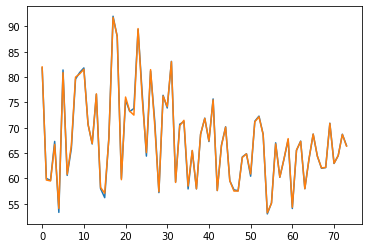

In [ ]:
plt.plot(scores_5["Actual Literacy Rate"], label='actual')
plt.plot(scores_5["Predicted Literacy Rate"], label='predicted')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model6 = RandomForestRegressor(n_jobs=-1, random_state=42)
model6.fit(X,y)

y_preds6 = model6.predict(X)
y_preds6

array([81.316     , 59.4524    , 59.157     , 64.75239669, 56.16320259,
       81.157     , 62.1918    , 67.789     , 80.266     , 80.885     ,
       81.393     , 71.883     , 67.63055096, 77.308     , 58.56153637,
       57.03628081, 67.80122183, 89.867     , 88.232     , 60.67643073,
       76.591     , 72.88595344, 69.56912095, 86.702     , 73.75836368,
       66.07520714, 81.276     , 69.57135251, 58.47270957, 72.92270874,
       72.32295344, 82.206     , 60.72441076, 71.515     , 70.45475344,
       60.68755975, 65.48095096, 58.01384997, 68.61779618, 72.09937921,
       67.2746508 , 74.46109674, 57.60690999, 66.29233213, 70.51065701,
       60.1950267 , 57.66843714, 57.57878376, 64.16535851, 64.50042162,
       60.96233068, 71.23481635, 71.98080703, 68.61914123, 54.43088463,
       55.27192447, 67.02201035, 61.0781344 , 63.77337817, 67.54205898,
       54.88527936, 64.93598707, 67.37201242, 57.78592892, 63.80310398,
       68.69001552, 64.39136058, 62.24980114, 62.29390015, 71.05

In [ ]:
accuracy = model6.score(X,y)
print(accuracy*100,"%")

98.14205264710239 %


In [ ]:
from sklearn.linear_model import LinearRegression
model7 = LinearRegression()
model7.fit(X,y)
model7.score(X,y)

0.3614754367951585

In [ ]:
from sklearn.linear_model import Ridge

model8 = Ridge(random_state=42)
model8.fit(X,y)
model8.score(X,y)

0.36105561925423446

In [ ]:
import xgboost as xgb

model9 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model9.fit(X,y)
model9.score(X,y)               

[17:07:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


-7.246991102301093